In [1]:
#import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("Google_Stock_Price_Train.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set = df.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [8]:
x_train = []
y_train = []
for i in range(60,1258):
  x_train.append(scaled_training_set[i-60:i,0])
  y_train.append(scaled_training_set[i,0])

x_train = np.array(x_train)
y_train = np.array(y_train)


In [11]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1198, 60, 1)

In [45]:
from sklearn.datasets import make_blobs
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD,Adam

In [16]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences= True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0,2))

regressor.add(LSTM(units = 50,return_sequences= True))
regressor.add(Dropout(0,2))
regressor.add(LSTM(units = 50,return_sequences= True))
regressor.add(Dropout(0,2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0,2))

regressor.add(Dense(units=1))



In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs = 50, batch_size = 32, verbose=2)

In [22]:
df1 = pd.read_csv("Google_Stock_Price_Train.csv")
actual_stock_price = df1.iloc[:,1:2].values

In [25]:
dataset_total = pd.concat((df['Open'], df1['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)- len(df1)-60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
x_test = []
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [28]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

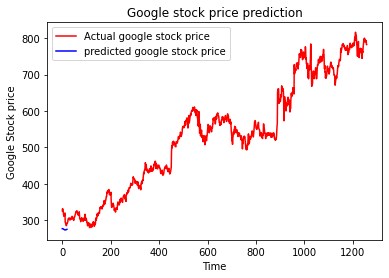

In [31]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual google stock price')
plt.plot(predicted_stock_price, color = 'blue', label = 'predicted google stock price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock price')
plt.legend()